<a href="https://colab.research.google.com/github/leee1124/ML-Class/blob/master/MobilePriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#필요한 라이브러리 import
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#기계학습 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

#전처리
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#성능평가
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 데이터 읽기
데이터파일은 csv파일로 주어졌으며,파일을 읽는 방법은 다양하지만 그 중에서 pd.read_csv로 읽어옴

In [ ]:
#데이터 읽기
train_df=pd.read_csv('/content/drive/MyDrive/ML/data/train.csv')
test_df=pd.read_csv('/content/drive//MyDrive/ML/data/test.csv')

## 3. EDA

In [ ]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
print("훈련세트의 shape",train_df.shape)
print("테스트세트의 shape",test_df.shape)

훈련세트의 shape (2000, 21)
테스트세트의 shape (1000, 21)



- 데이터의 수는 훈련세트는 2000개, 테스트세트는 1000개
- 특성은 각각 21개
- 훈련세트는 price_range특성을, 테스트세트는 id특성을 가지고 있는 부분만 다르고 나머지 20개의 특성은 동일

1. id: ID
2. battery_power: 배터리 용량
3. blue: 블루투스 가능 여부
4. clock_speed: CPU 속도
5. dual_sim: 듀얼심 가능 여부
6. fc: 전면 카메라 픽셀
7. four_g: 4G 사용 가능한지
8. int_memory:내부 용량
9. m_dep: 두께
10. mobile_wt: 무게
11. n_cores: CPU의 코어 갯수
12. pc: 주요 카메라(후면카메라) 메가 픽셀
13. px_height: 픽셀 해상도 높이
14. px_width: 픽셀 해상도 폭
15. ram: 램용량
16. sc_h: 화면의 높이
17. sc_w: 화면의 폭
18. talk_time: 1회 완충 후 최대 사용 시간
19. three_g: 3g 사용 가능한지 여부
20. touch_screen: 터치스크린 존재 여부
21. wifi: 와이파이 존재 여부
22. price_range: 가격대

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

훈련세트와 테스트 세트의 모든 특에 결측값이 없다.

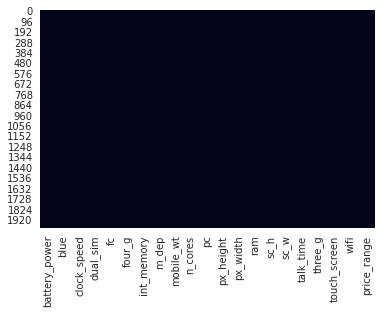

In [ ]:
#훈련 데이터 결측값 시각화
sns.heatmap(train_df.isnull(),cbar=False)

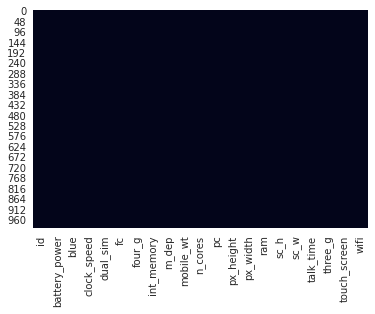

In [ ]:
#테스트 데이터 결측값 시각화
sns.heatmap(test_df.isnull(),cbar=False)

Text(0.5, 1.0, 'Correlations')

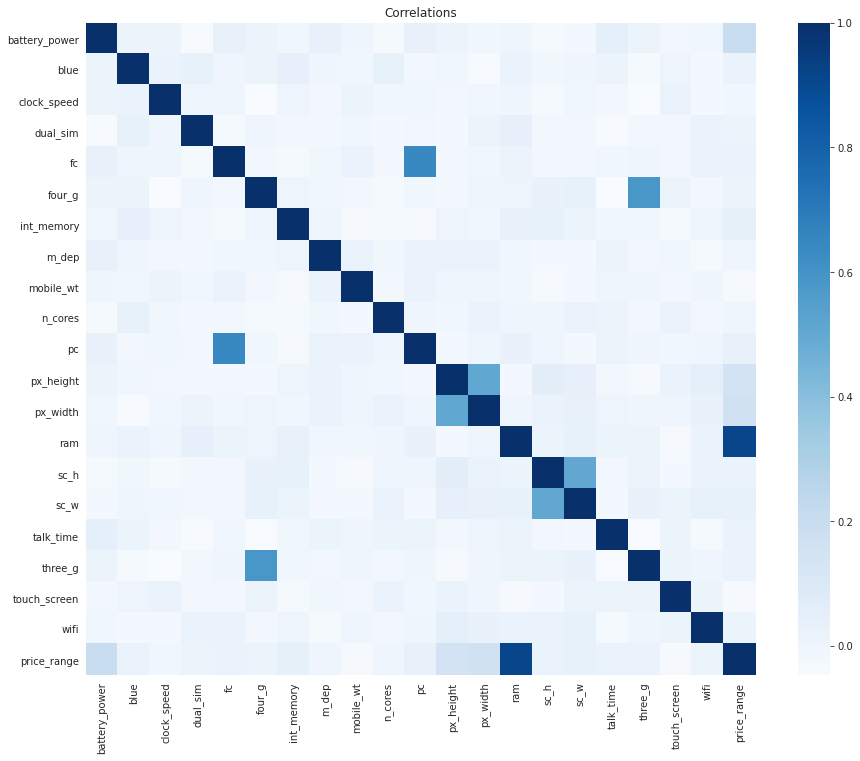

In [ ]:
#상관관계 분석(시각화)
plt.figure(figsize=(15,12))
corr=train_df.corr()
sns.heatmap(corr,cmap='Blues').set_title('Correlations')

ram, battery_power, px_width, px_height 순서로 target_value인 price_range와의 상관관계가 높아 보인다. 

In [ ]:
# target value와 다른 특성들과의 상관관계 분석
corr.sort_values(by=['price_range'],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

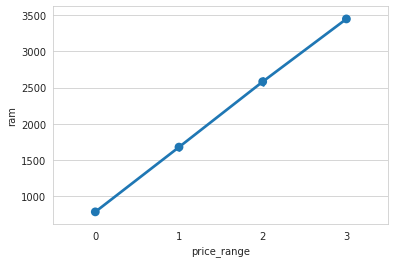

In [ ]:
#target value와 상관관계가 가장 높은 ram특성과의 관계를 시각화 
sns.pointplot(y='ram', x='price_range', data=train_df)

히트맵으로 봤을 때 예상한 것 처럼 price_range 특성은 ram, battery_power, px_width, px_height 순으로 상관관계가 높다.

가격대가 높아질수록 ram의 용량도 증가한다.

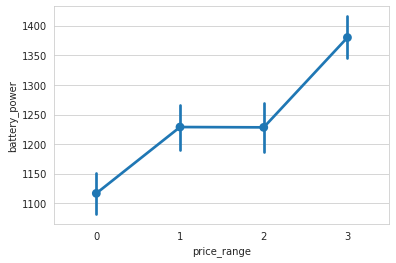

In [ ]:
#target value와 두번째로 상관관계가 높은 battery_power 특성의 관계를 시각화
sns.pointplot(y='battery_power', x='price_range', data=train_df)


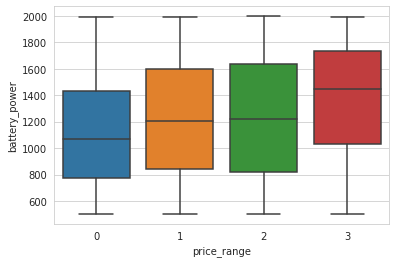

In [ ]:
sns.boxplot(x='price_range', y='battery_power', data=train_df)

- 가격대가 높아져도 배터리 용량은 그대로인 구간이 있어 상자그림으로 표현.
- 중앙값은 같지만, 1분위수와 3분위수가 다른 것을 확인할 수 있다.

훈련세트에는 각 가격대마다 500개의 휴대전화가 존재한다

In [ ]:
#범주형 특성
categorical=['blue','dual_sim','four_g','three_g','touch_screen','wifi', 'price_range']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


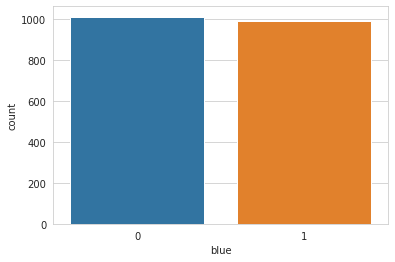

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


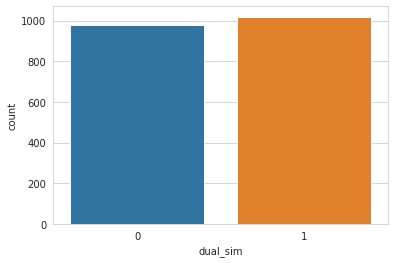

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


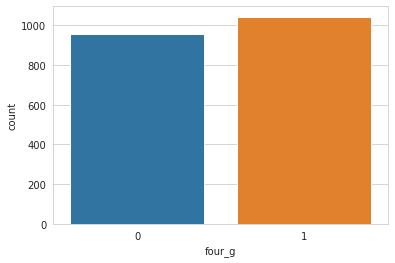

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


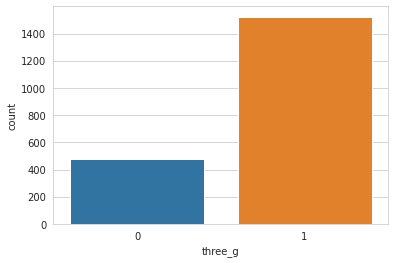

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


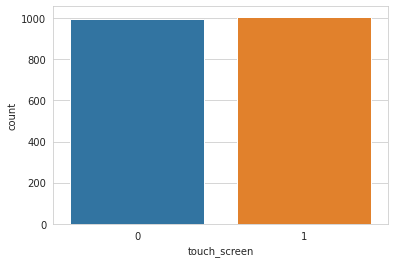

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


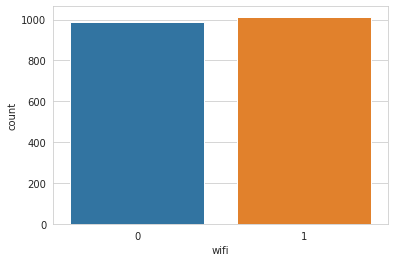

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


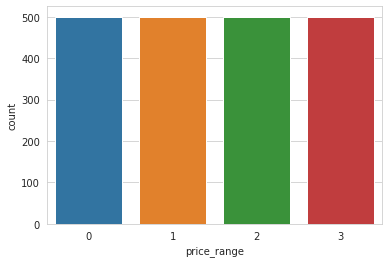

In [ ]:
#범주형 특성을 시각화
for i in categorical:
  sns.countplot(train_df[i])
  plt.xlabel(i)
  plt.show()

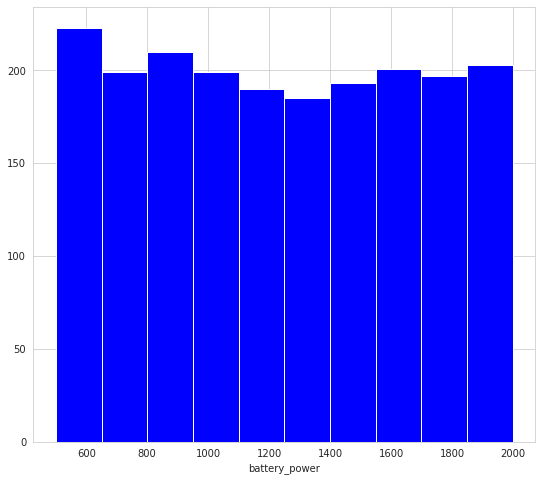

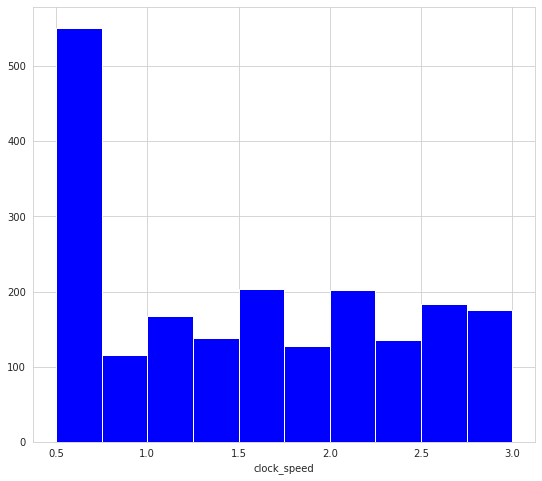

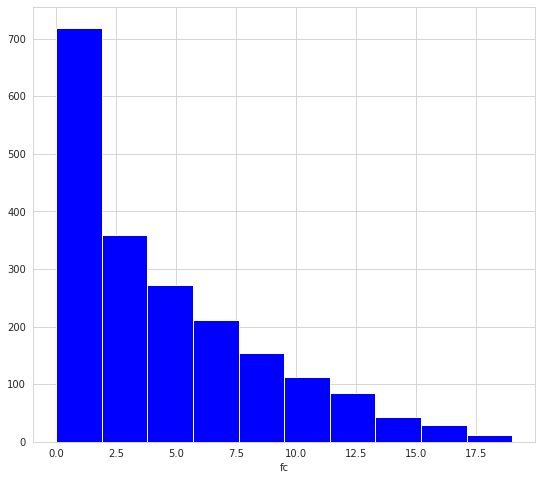

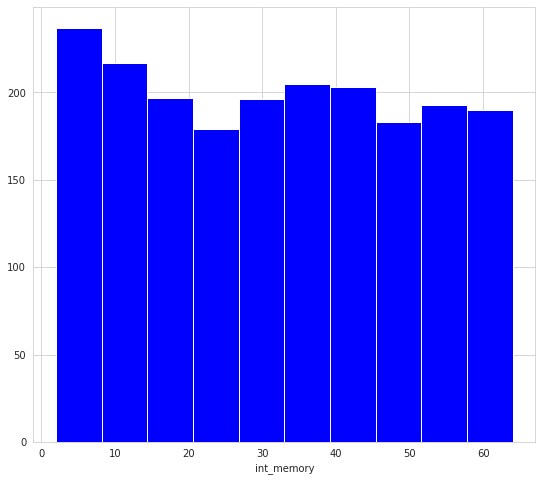

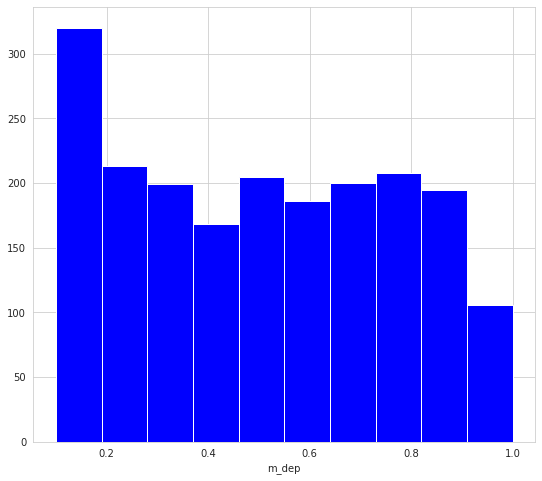

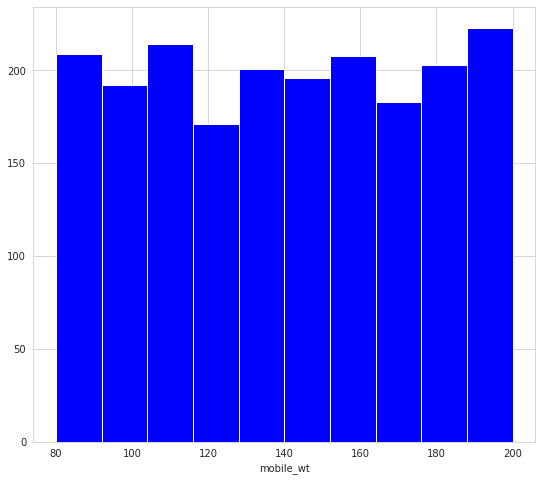

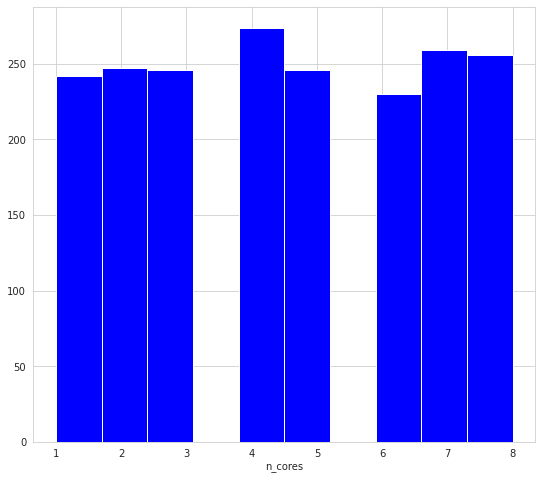

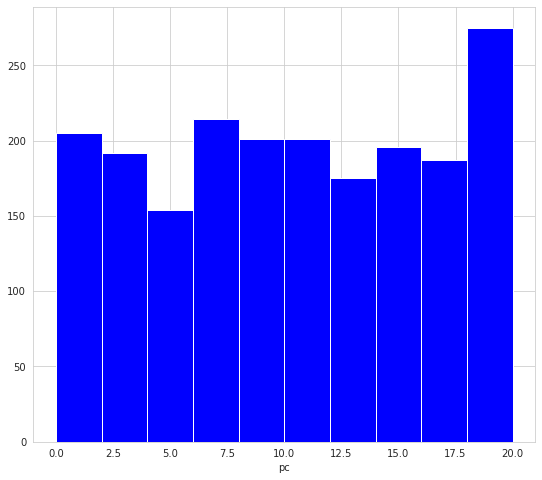

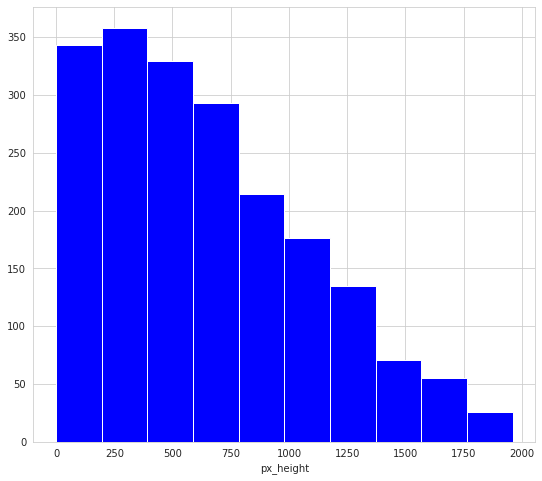

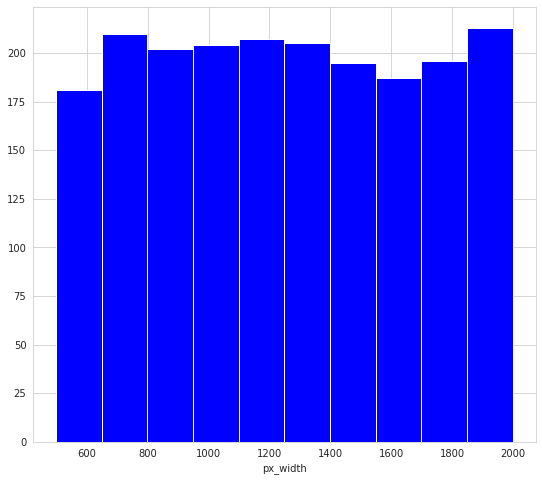

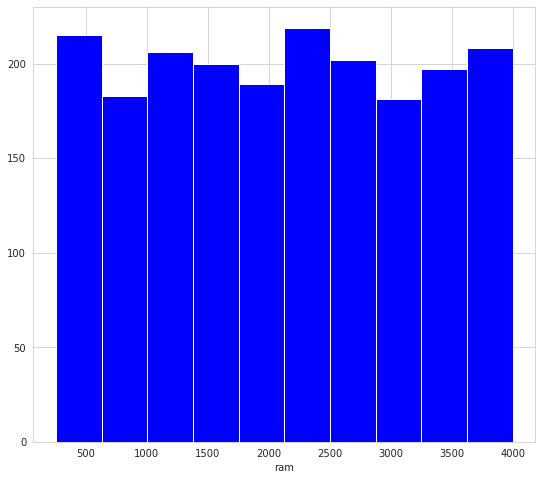

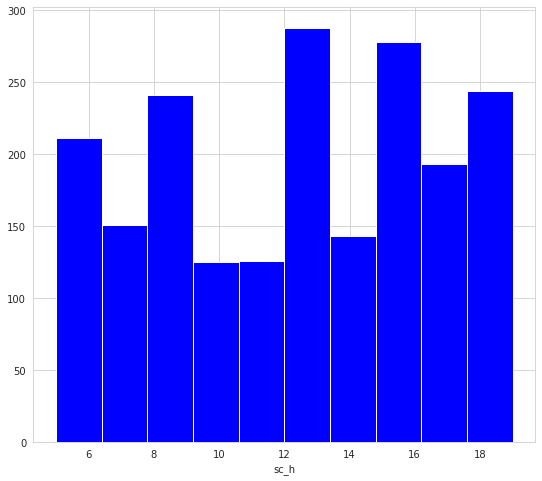

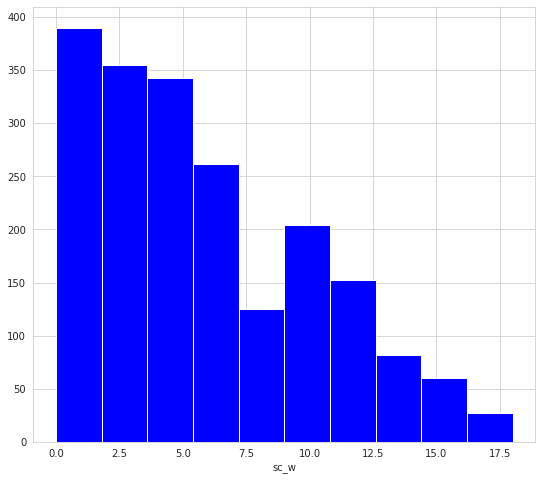

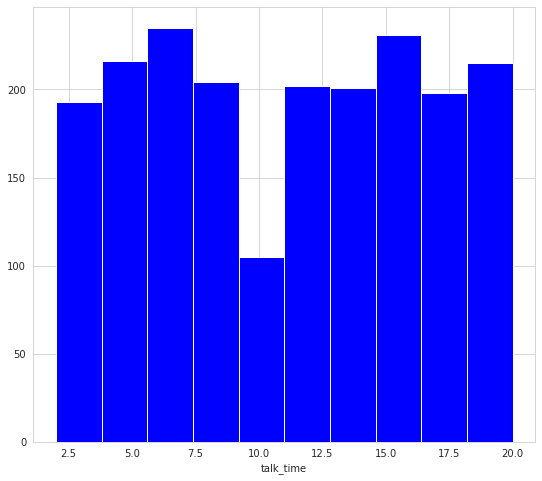

In [ ]:
#수치형 특성을 시각화
for i in train_df.drop(train_df[categorical], axis=1):
  fig=plt.figure(figsize=(9,8))
  plt.hist(train_df[i], color='blue', bins=10)
  plt.xlabel(i)
  plt.show()

## 4. Models
- test 데이터셋의 score는 알 수 없기 때문에, train 데이터셋을 나누어서 test 데이터셋을 만들어서 검증용으로 사용한다.
- 위에서 말한 test데이터셋은 test_df와는 다른 평가를 위한 데이터셋이다. 편의를 위해서 검증세트(validation set)라고 부르도록 한다.

In [ ]:
#입출력값 설정
X = train_df.drop('price_range', axis=1)#입력 값은 price_range를 제외한 모든 특성
y = train_df['price_range'] #출력 값은 price_range

In [ ]:
#train_test_split을 이용해 훈련세트(X_train, y_train)와 검증세트(x_valid, y_valid)로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X,y, random_state=21)
# 검증세트의 비율은 기본값(25%)

In [ ]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_valid)

print("훈련세트 점수{:.2f}".format(knn.score(X_train, y_train)))
print("검증세트 점수{:.2f}".format(knn.score(X_valid, y_valid)))

훈련세트 점수0.95
검증세트 점수0.94


In [ ]:
#로지스틱 회귀
logreg = LogisticRegression(C=100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)

print("훈련세트 점수{:.2f}".format(logreg.score(X_train, y_train)))
print("검증세트 점수{:.2f}".format(logreg.score(X_valid, y_valid)))

훈련세트 점수0.64
검증세트 점수0.62


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#랜덤포레스트
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_valid)

print("훈련세트 점수{:.2f}".format(forest.score(X_train, y_train)))
print("검증세트 점수{:.2f}".format(forest.score(X_valid, y_valid)))

훈련세트 점수1.00
검증세트 점수0.90


In [ ]:
#그레이디언트 부스팅
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_valid)

print("훈련세트 점수{:.2f}".format(gbrt.score(X_train, y_train)))
print("검증세트 점수{:.2f}".format(gbrt.score(X_valid, y_valid)))

훈련세트 점수1.00
검증세트 점수0.91


In [ ]:
#linear_svc
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_valid)

print("훈련세트 점수{:.2f}".format(linear_svc.score(X_train, y_train)))
print("검증세트 점수{:.2f}".format(linear_svc.score(X_valid, y_valid)))

훈련세트 점수0.45
검증세트 점수0.50


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


데이터 전처리가 되지 않아서 그런지 정확도가 매우 낮다. 서포트벡터의 정확도를 높이기 위해 MinMaxScaler와 StandardScaler를 사용해보기로 한다.

In [ ]:
#MinMaxScaler 이후 linear_svc
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

linear_svc.fit(X_train_scaled, y_train)
y_pred=linear_svc.predict(X_valid_scaled)

print("MinMaxScaler로 스케일 조정된 훈련세트 점수: {:.2f}".format(linear_svc.score(X_train_scaled, y_train)))
print("MinMaxScaler로 스케일 조정된 검증세트 점수: {:.2f}".format(linear_svc.score(X_valid_scaled, y_valid)))

MinMaxScaler로 스케일 조정된 훈련세트 점수: 0.82
MinMaxScaler로 스케일 조정된 검증세트 점수: 0.82


In [ ]:
#StandardScaler 이후 linear_svc
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

linear_svc.fit(X_train_scaled, y_train)
y_pred=linear_svc.predict(X_valid_scaled)

print("StandardScaler로 스케일 조정된 훈련세트 점수: {:.2f}".format(linear_svc.score(X_train_scaled, y_train)))
print("StandardScaler로 스케일 조정된 검증세트 점수: {:.2f}".format(linear_svc.score(X_valid_scaled, y_valid)))

StandardScaler로 스케일 조정된 훈련세트 점수: 0.86
StandardScaler로 스케일 조정된 검증세트 점수: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear_SVC를 사용하면 StandardScaler를 사용해 전처리를 했을 때 가장 성능이 좋은 것을 확인할 수 있다. 

In [ ]:
#MLP
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_valid)

print("훈련세트 점수: {:.2f}".format(linear_svc.score(X_train, y_train)))
print("검증세트 점수: {:.2f}".format(linear_svc.score(X_valid, y_valid)))

훈련세트 점수: 0.26
검증세트 점수: 0.23


In [ ]:
#MinMaxScaler로 스케일 조정한 후 MLP
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_valid_scaled)

print("훈련세트 점수: {:.2f}".format(linear_svc.score(X_train_scaled, y_train)))
print("검증세트 점수: {:.2f}".format(linear_svc.score(X_valid_scaled, y_valid)))

훈련세트 점수: 0.37
검증세트 점수: 0.32


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#StandardScaler로 스케일 조정한 후 MLP
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_valid_scaled)

print("훈련세트 점수: {:.2f}".format(linear_svc.score(X_train_scaled, y_train)))
print("검증세트 점수: {:.2f}".format(linear_svc.score(X_valid_scaled, y_valid)))

훈련세트 점수: 0.86
검증세트 점수: 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#StandardScaler로 스케일 조정한 후 MLP
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_valid_scaled)

print("훈련세트 점수: {:.2f}".format(linear_svc.score(X_train_scaled, y_train)))
print("검증세트 점수: {:.2f}".format(linear_svc.score(X_valid_scaled, y_valid)))

훈련세트 점수: 0.86
검증세트 점수: 0.86
